Forested Protected Lands
===

This notebook uses the natural land area and total geometry area obtained from ModelMyWatershed in `Retrieve_Natural_Land.ipynb` to ultimately determine the percent of natural protected land within each focus area. 

# Setup

## Imports

In [1]:
# Import packages
from pathlib import Path
from importlib import reload
import warnings

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.validation import make_valid

# Plotting packages
# import matplotlib
import matplotlib.pyplot as plt
from  matplotlib.colors import LogNorm
import contextily as ctx
import colorcet as cc
from colorcet.plotting import swatch, swatches, sine_combs
import holoviews as hv
import cmasher as cmr

In [2]:
# Look at swatches
# hv.extension("matplotlib")
#swatches(group='linear')

# CET_D3, CET_CBTL4, diverging_gkr_60_10_c40

In [3]:
# If kernel has not been restarted, restart before running this cell
# Confirm that this repo is in your Python Path
#!conda-develop "/Users/clulay/OneDrive - LimnoTech/Documents/GitHub/pollution-assessment/src"

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
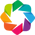

In [4]:
# Import PA custom functions
import pollution_assessment as pa
from pollution_assessment import plot, plot_protected_land

In [5]:
# Supress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
print("Geopandas: ", gpd.__version__)

Geopandas:  0.14.2


## File paths

In [7]:
# Find your current working directory, which should be folder for this notebook.
Path.cwd()

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment/stage2')

In [8]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [9]:
# Path to WeConservePA protected lands shapefile
wcpa_path = project_path / 'stage2/Protected_Lands/WCPA_exclude_DRWI.parquet'
wcpa_path.exists()

True

In [10]:
# Assign a path for the data OUTPUT folder.
data_output_path = project_path / 'stage2/data_output/'

## Private file paths
- Download from https://drive.google.com/drive/folders/1HKlnA3lC2xvKBQ1bg1J08gsEB3N9rp2V
- Save in `stage2/private` folder

In [11]:
# Path to FieldDoc protected lands export file
fielddoc_path = project_path / 'stage2/private/protection_bmps_from_FieldDoc.parquet'
fielddoc_path.exists()

True

In [12]:
# Path to parcel file
# parcel_path = project_path / 'stage2/private/parcels_headwater_pa2/parcels_headwater_pa2_75f_90n.shp'
parcel_path = project_path / 'stage2/private/headwaters_opportunity_parcels/parcels_headwater_pa2_75f_90n.shp'
parcel_path.exists()

True

# Load data

## WeConservePA protected lands

### Spatial 

In [13]:
# Import weconservePA protected lands
wcpa_gdf = gpd.read_parquet(wcpa_path)

In [14]:
# Add data source tag
wcpa_gdf['data_source'] = 'weconservePA_2022'

### Natural lands

In [15]:
# Load all natural land parquet files
wcpa1_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/wcpa1_naturalland.parquet')) 
wcpa2_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/wcpa2_naturalland.parquet'))  
wcpa3_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/wcpa3_naturalland.parquet'))  
wcpa4_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/wcpa4_naturalland.parquet'))  
wcpa5_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/wcpa5_naturalland.parquet'))  

In [16]:
# Concatenate all WCPA natural land files
wcpa_natural_df = pd.concat(
    [
        wcpa1_natural_df,
        wcpa2_natural_df,
        wcpa3_natural_df,
        wcpa4_natural_df,
        wcpa5_natural_df,
    ],
)
wcpa_natural_df.head()

name    mmw_area_m2  forest_area_m2  natural_area_m2  perc_forest  \
0     1  188438.510502    54736.900670     54736.900670    29.047619   
1     2  201006.110237        0.000000     17049.625422     0.000000   
2     3   62817.072778     7179.094032     61022.299270    11.428571   
3     4  679318.653043    34100.540047    334723.722041     5.019815   
4     5  109462.570145      897.234182      9869.575997     0.819672   

   perc_natural     area_ac  
0     29.047619   46.209891  
1      8.482143   49.392749  
2     97.142857   15.743589  
3     49.273448  168.223510  
4      9.016393   26.857754

## FieldDoc protected lands

### Spatial

In [17]:
# Import FieldDoc protected lands
fielddoc_gdf = gpd.read_parquet(fielddoc_path)

# Add a column to fielddoc_gdf with data source
fielddoc_gdf['data_source'] = 'fielddoc_2022-08-11'

In [18]:
#Identify any invalid geometries
fielddoc_gdf_invalid = fielddoc_gdf[fielddoc_gdf.is_valid == False]
invalid_ind = fielddoc_gdf_invalid.index.to_list()
fielddoc_gdf_invalid

practice_name  practice_id  \
51                  Cherry Valley        51721   
65  Lubbers Run Greenway Phase II        51769   

                                         program_name  program_id  \
51  Delaware River Watershed Protection Fund - For...           5   
65  Delaware River Watershed Protection Fund - For...           5   

                                        organization description  \
51  Academy of Natural Sciences of Drexel University        None   
65                                       The Commons        None   

            practice_type                   created_at  \
51  Conservation easement  2021-07-07T20:52:08.441117Z   
65  Conservation easement  2021-07-12T15:50:59.231051Z   

                    modified_at  tot_pwr  head_pwr  nat_land  ara_pwr  \
51  2021-07-19T13:45:32.427800Z  1212.41   1212.41   1207.83    44.39   
65  2021-07-12T15:52:54.715969Z  2206.46   2199.19   2389.41   632.76   

    wet_pwr  dev_land  ag_land  str_bank  \
51     4.10      7.34     0.00      0.44   
65   233.84     44.03    17.12      9.92   

                                             geometry          data_source  
51  POLYGON ((-75.28705 40.85999, -75.28807 40.861...  fielddoc_2022-08-11  
65  MULTIPOLYGON (((-74.69218 40.95727, -74.69216 ...  fielddoc_2022-08-11

In [19]:
# Fix invalid geometries
for i in invalid_ind:
    geom = fielddoc_gdf.loc[i]['geometry']
    valid = make_valid(geom)
    fielddoc_gdf.at[i,'geometry'] = valid

### Natural lands

In [20]:
# Load natural land parquet file
fd_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/fd_naturalland.parquet'))  

## DRWI geographies

### Spatial

In [21]:
# Load cluster and focus area geometries
cluster_gdf = gpd.read_parquet(project_path / Path('stage1/data/cluster_df.parquet'))  
focusarea_gdf = gpd.read_parquet(project_path / Path('stage1/data/fa_phase2_df.parquet'))

# Add a "-" to the KC Aquifer name for consistency
focusarea_gdf.cluster = focusarea_gdf.cluster.replace('Kirkwood Cohansey Aquifer', 'Kirkwood - Cohansey Aquifer') 
focusarea_gdf.set_index('name', inplace=True)

### Natural lands

In [22]:
# Load cluster natural land parquet file
cl_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/cluster_naturalland.parquet'))  
cl_natural_df = cl_natural_df.drop('ans_area_ac', axis=1)

# Add a "-" to the KC Aquifer name for consistency
cl_natural_df['name'] = cl_natural_df['name'].replace('Kirkwood Cohansey Aquifer', 'Kirkwood - Cohansey Aquifer')

# Reset index to join on index
cl_natural_df.name = cl_natural_df.name.astype(pd.CategoricalDtype())
cl_natural_df.set_index('name', inplace=True)

In [23]:
# Load focus area natural land parquet file
fa_natural_df = pd.read_parquet(project_path / Path('stage2/Protected_Lands/natural_lands/focusarea_naturalland.parquet'))  
# fa_natural_df = fa_natural_df.drop('ans_area_ac', axis=1)

# Reset index to join on index
fa_natural_df.name = fa_natural_df.name.astype(pd.CategoricalDtype())
fa_natural_df.set_index('name', inplace=True)

## HUCs

### HUC08 Spatial
Read file created in Notebook 1: `PA2_1_FetchData.ipynd`

In [24]:
huc08_outlets_drwi_gdf = gpd.read_parquet(project_path / 'geography/huc08_outlets_drwi_gdf.parquet')
huc08_outlets_drwi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 15 entries, 02040101 to 02040302
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   huc08_name  15 non-null     category
 1   geometry    15 non-null     geometry
 2   comid       15 non-null     int64   
 3   nord        15 non-null     int64   
 4   in_drb      15 non-null     boolean 
dtypes: boolean(1), category(1), geometry(1), int64(2)
memory usage: 1.8 KB


In [25]:
# Make alias to for backward compatibilty with Caitlin's code
huc08_gdf = huc08_outlets_drwi_gdf

### HUC10 Spatial
Read file created in Notebook 1: `PA2_1_FetchData.ipynd`

In [26]:
huc10_outlets_drwi_gdf = gpd.read_parquet(project_path / 'geography/huc10_outlets_drwi_gdf.parquet')
huc10_outlets_drwi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 95 entries, 0204010101 to 0204030204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   huc10_name  95 non-null     category
 1   geometry    95 non-null     geometry
 2   comid       95 non-null     int64   
 3   nord        95 non-null     int64   
 4   in_drb      95 non-null     boolean 
 5   huc08       95 non-null     category
dtypes: boolean(1), category(2), geometry(1), int64(2)
memory usage: 13.7 KB


### HUC12 Spatial
Read file created in Notebook 1: `PA2_1_FetchData.ipynd`

In [27]:
huc12_outlets_drwi_gdf = gpd.read_parquet(project_path / 'geography/huc12_outlets_drwi_gdf.parquet')
huc12_outlets_drwi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   huc12_name     481 non-null    category
 1   geometry       481 non-null    geometry
 2   centroid_xy    481 non-null    object  
 3   comid          481 non-null    Int64   
 4   nord           481 non-null    Int64   
 5   to_huc12       481 non-null    category
 6   outlet_comid   481 non-null    Int64   
 7   from_huc12s    231 non-null    object  
 8   inlet_comids   231 non-null    object  
 9   outlet_comids  481 non-null    object  
 10  huc10          481 non-null    category
 11  huc08          481 non-null    category
 12  in_drb         481 non-null    boolean 
dtypes: Int64(3), boolean(1), category(4), geometry(1), object(4)
memory usage: 90.5+ KB


#### Add HUC10 & HUC08 names
For sorting results

In [28]:
huc10_name_series = huc12_outlets_drwi_gdf.join(huc10_outlets_drwi_gdf.huc10_name, on='huc10')['huc10_name']
huc12_outlets_drwi_gdf.insert(11, 'huc10_name', huc10_name_series)
huc12_outlets_drwi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   huc12_name     481 non-null    category
 1   geometry       481 non-null    geometry
 2   centroid_xy    481 non-null    object  
 3   comid          481 non-null    Int64   
 4   nord           481 non-null    Int64   
 5   to_huc12       481 non-null    category
 6   outlet_comid   481 non-null    Int64   
 7   from_huc12s    231 non-null    object  
 8   inlet_comids   231 non-null    object  
 9   outlet_comids  481 non-null    object  
 10  huc10          481 non-null    category
 11  huc10_name     481 non-null    category
 12  huc08          481 non-null    category
 13  in_drb         481 non-null    boolean 
dtypes: Int64(3), boolean(1), category(5), geometry(1), object(4)
memory usage: 95.8+ KB


In [29]:
huc08_name_series =  huc12_outlets_drwi_gdf.join(huc08_outlets_drwi_gdf.huc08_name, on='huc08')['huc08_name']
huc12_outlets_drwi_gdf.insert(13, 'huc08_name', huc08_name_series)
huc12_outlets_drwi_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   huc12_name     481 non-null    category
 1   geometry       481 non-null    geometry
 2   centroid_xy    481 non-null    object  
 3   comid          481 non-null    Int64   
 4   nord           481 non-null    Int64   
 5   to_huc12       481 non-null    category
 6   outlet_comid   481 non-null    Int64   
 7   from_huc12s    231 non-null    object  
 8   inlet_comids   231 non-null    object  
 9   outlet_comids  481 non-null    object  
 10  huc10          481 non-null    category
 11  huc10_name     481 non-null    category
 12  huc08          481 non-null    category
 13  huc08_name     481 non-null    category
 14  in_drb         481 non-null    boolean 
dtypes: Int64(3), boolean(1), category(6), geometry(1), object(4)
memory usage: 97.0+ KB


In [30]:
# Make alias to for backward compatibilty with Caitlin's code
huc12_gdf = huc12_outlets_drwi_gdf

### Natural lands
Created with `stage2/Protected_Lands/Retrieve_Natural_Land.ipynb`

In [31]:
huc12_natural_df = pd.read_parquet(project_path / 
    'stage2/Protected_Lands/natural_lands/huc12_naturallands.parquet'
) 
huc12_natural_df.rename(columns={'name':'huc12'}, inplace=True)
huc12_natural_df.set_index('huc12', inplace=True)
huc12_natural_df.sort_index(inplace=True)
huc12_natural_df.index = huc12_natural_df.index.astype(pd.CategoricalDtype(ordered=True))
huc12_natural_df.drop(['area_ac'], axis=1, inplace=True) # values were all blank
huc12_natural_df.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 538 entries, 020401010101 to 020403040502
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mmw_area_m2      538 non-null    float64
 1   forest_area_m2   538 non-null    float64
 2   natural_area_m2  538 non-null    float64
 3   perc_forest      538 non-null    float64
 4   perc_natural     538 non-null    float64
dtypes: float64(5)
memory usage: 42.4 KB


### Protected lands
Created with `stage2/Protected_Lands/Retrieve_Protected_Land.ipynb`

In [32]:
huc12_protec_gdf = pd.read_parquet(project_path / 
    'stage2/Protected_Lands/huc12_protection.parquet'
)
huc12_protec_gdf.sort_index(inplace=True)
huc12_protec_gdf.index = huc12_protec_gdf.index.astype(pd.CategoricalDtype(ordered=True))
# drop geometry, because we don't need it, and it is binary
huc12_protec_gdf.drop('geometry',axis=1,inplace=True)
huc12_protec_gdf.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 484 entries, 020401010101 to 020403030101
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   huc_ac                484 non-null    float64
 1   wcpa_ac               484 non-null    float64
 2   fd_ac                 484 non-null    float64
 3   total_perc_protected  484 non-null    float64
dtypes: float64(4)
memory usage: 36.0 KB


## Parcels

In [33]:
parcel_gdf = gpd.read_file(parcel_path)
parcel_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         4380 non-null   int64   
 1   gis_acre    4380 non-null   float64 
 2   tax_pin     4354 non-null   object  
 3   county      4380 non-null   object  
 4   muni        4323 non-null   object  
 5   owner1      4303 non-null   object  
 6   owner2      724 non-null    object  
 7   owner3      249 non-null    object  
 8   address1    4039 non-null   object  
 9   address2    2075 non-null   object  
 10  address3    2354 non-null   object  
 11  address4    870 non-null    object  
 12  land_use    1414 non-null   object  
 13  propdesc    636 non-null    object  
 14  propclass   2993 non-null   object  
 15  zoning      59 non-null     object  
 16  protected   86 non-null     object  
 17  prot_nlt_o  4380 non-null   float64 
 18  prot_nlt_1  4380 non-null   float64 
 19

# Join natural lands to original gdfs

Natural lands gdfs do not contain spatial information, so they must b ejoined to the original gdfs which do contain this information.

## Clusters

In [34]:
clusterjoin_gdf = cluster_gdf.join(cl_natural_df, lsuffix='_cluster_gdf')

## Focus areas

In [35]:
fajoin_gdf = focusarea_gdf.join(fa_natural_df, lsuffix='_focusarea_gdf')

## FieldDoc

In [36]:
fielddocjoin_gdf = fielddoc_gdf.merge(fd_natural_df, left_on='practice_id', right_on='name', how='left')

In [37]:
#Identify any invalid geometries
fielddocjoin_gdf_invalid = fielddocjoin_gdf[fielddocjoin_gdf.is_valid == False]
invalid_ind = fielddocjoin_gdf_invalid.index.to_list()

# Fix invalid geometries
for i in invalid_ind:
    geom = fielddocjoin_gdf.loc[i]['geometry']
    valid = make_valid(geom)
    fielddocjoin_gdf.at[i,'geometry'] = valid

## WeConservePA

In [38]:
wcpajoin_gdf = wcpa_gdf.merge(wcpa_natural_df, left_on='OBJECTID', right_on='name', how='left')

In [39]:
#Identify any invalid geometries
wcpa_gdf_invalid = wcpajoin_gdf[wcpajoin_gdf.is_valid == False]
invalid_ind = wcpa_gdf_invalid.index.to_list()

# Fix invalid geometries
for i in invalid_ind:
    geom = wcpajoin_gdf.loc[i]['geometry']
    valid = make_valid(geom)
    wcpajoin_gdf.at[i,'geometry'] = valid

## HUCs

In [40]:
huc12join_gdf = huc12_gdf.merge(
    huc12_natural_df, left_on='huc12', right_on='huc12', how='left',
)

In [41]:
huc12_protec_gdf = huc12_gdf.merge(
    huc12_protec_gdf, left_on='huc12', right_on='huc12', how='left'
)

In [42]:
huc12_protec_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   huc12_name            481 non-null    category
 1   geometry              481 non-null    geometry
 2   centroid_xy           481 non-null    object  
 3   comid                 481 non-null    Int64   
 4   nord                  481 non-null    Int64   
 5   to_huc12              481 non-null    category
 6   outlet_comid          481 non-null    Int64   
 7   from_huc12s           231 non-null    object  
 8   inlet_comids          231 non-null    object  
 9   outlet_comids         481 non-null    object  
 10  huc10                 481 non-null    category
 11  huc10_name            481 non-null    category
 12  huc08                 481 non-null    category
 13  huc08_name            481 non-null    category
 14  in_drb                48

# Set CRS

In [43]:
# FD has no projection. Assign projection first, then convert to equal-area
fielddocjoin_gdf = fielddocjoin_gdf.set_crs(epsg=4326, inplace=True,allow_override=True)
fielddoc_gdf = fielddoc_gdf.set_crs(epsg=4326, inplace=True,allow_override=True)

In [44]:
# Set to equal area crs for proper computation of areas
ea_crs = 'ESRI:102003' 

gdf_list = [fielddocjoin_gdf, clusterjoin_gdf, fajoin_gdf,
            wcpajoin_gdf, huc12join_gdf, huc08_gdf,
            huc12_gdf, fielddoc_gdf, wcpa_gdf, huc12_protec_gdf,
            parcel_gdf]

for item in gdf_list:
    item.to_crs(crs=ea_crs, inplace=True)

In [45]:
parcel_gdf.crs

<Projected CRS: ESRI:102003>
Name: USA_Contiguous_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [46]:
sum(wcpajoin_gdf.geometry.area)/4046

2146183.7134045498

# Compute % natural

## Within focus area

In [47]:
focusareas = fajoin_gdf.index.unique()
focusareas = focusareas.tolist()

fa_nl = {'name': [], 'FieldDoc_PercNat': [], 'WCPA_PercNat': []}

for fa in focusareas:
    # Return cluster area in m2
    geom = fajoin_gdf.loc[[fa]]
    fa_area = geom.geometry.area.sum()
    
    fd_in_fa = fielddocjoin_gdf.clip(geom)
    fd_nl = np.nansum(fd_in_fa['natural_area_m2'])
    fd_area = np.nansum(fd_in_fa['mmw_area_m2'])
    fd_in_fa_area = fd_in_fa.geometry.area.sum()
    
    if fd_in_fa_area > 0:
        # Compute FD ratio natural to total area
        fd_percnat = fd_nl/fd_area
        
        # FD natural area in fa
        fd_nl_in_fa_area = fd_percnat*fd_in_fa_area
        
        # Divide FD natural area in FA by FA area to get percent of FA
        fd_perc_nat_in_fa = fd_nl_in_fa_area/fa_area*100
        
    else:
        fd_perc_nat_in_fa = 0
        
    subwcpa = wcpajoin_gdf[wcpajoin_gdf['RECLASS2'] != 'Agricultural Easement']
    wcpa_in_fa = wcpajoin_gdf.clip(geom)
    wcpa_nl = np.nansum(wcpa_in_fa['natural_area_m2'])
    wcpa_area = np.nansum(wcpa_in_fa['mmw_area_m2'])
    wcpa_in_fa_area = wcpa_in_fa.geometry.area.sum()
    
    if wcpa_in_fa_area > 0:
        # Compute WCPA ratio natural to total area
        wcpa_percnat = wcpa_nl/wcpa_area
        
        # Multiply % natural of total parcel by area in FA to get WCPA natural area in FA
        wcpa_nl_in_fa_area = wcpa_percnat*wcpa_in_fa_area

        # Divide WCPA natural area in FA by FA area to get percent of FA
        wcpa_perc_nat_in_fa = wcpa_nl_in_fa_area/fa_area*100
        
    else:
        wcpa_perc_nat_in_fa = 0
        
    fa_nl['name'].append(fa)
    fa_nl['FieldDoc_PercNat'].append(fd_perc_nat_in_fa)
    fa_nl['WCPA_PercNat'].append(wcpa_perc_nat_in_fa)
    
fa_nl_df = pd.DataFrame.from_dict(fa_nl)

In [48]:
fajoin_gdf = fajoin_gdf.reset_index()

In [49]:
fajoin_gdf = fajoin_gdf.merge(right=fa_nl_df, left_on='name', right_on='name', how='left')

In [50]:
columns_to_drop = ['change', 'tier', 'subfocusare', 'geom_buff',]
fajoin_gdf.drop(columns=columns_to_drop, inplace=True)

In [51]:
columns_to_cat = ['name', 'cluster', 'strategy', 'phase', 'name_final',] 
fajoin_gdf[columns_to_cat] = fajoin_gdf[columns_to_cat].astype(pd.CategoricalDtype())

In [52]:
fajoin_gdf.set_index('name', inplace=True)

In [53]:
fajoin_gdf.info()
fajoin_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 66 entries, Brandywine Creek Headwaters to Naylors_Run
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   cluster           66 non-null     category
 1   strategy          59 non-null     category
 2   nord              66 non-null     int64   
 3   phase             66 non-null     category
 4   geom              66 non-null     geometry
 5   area_acres        66 non-null     float64 
 6   name_final        59 non-null     category
 7   mmw_area_m2       66 non-null     float64 
 8   forest_area_m2    66 non-null     float64 
 9   natural_area_m2   66 non-null     float64 
 10  perc_forest       66 non-null     float64 
 11  perc_natural      66 non-null     float64 
 12  ans_area_ac       66 non-null     float64 
 13  FieldDoc_PercNat  66 non-null     float64 
 14  WCPA_PercNat      66 non-null     float64 
dtypes: category(4), float64(9),

cluster     strategy   nord  \
name                                                                           
Brandywine Creek Headwaters     Brandywine and Christina  restoration   1165   
Plum Run                        Brandywine and Christina  restoration    928   
Red Clay Creek                  Brandywine and Christina  restoration   1469   
White Clay Creek                Brandywine and Christina  restoration   1351   
Cohansey River               Kirkwood - Cohansey Aquifer  restoration  14605   

                               phase  \
name                                   
Brandywine Creek Headwaters  Phase 2   
Plum Run                     Phase 2   
Red Clay Creek               Phase 2   
White Clay Creek             Phase 2   
Cohansey River               Phase 2   

                                                                          geom  \
name                                                                             
Brandywine Creek Headwaters  MULTIPOLYGON (((1686405.304 471511.505, 168640...   
Plum Run                     MULTIPOLYGON (((1712902.753 454768.959, 171289...   
Red Clay Creek               MULTIPOLYGON (((1708818.239 448622.021, 170876...   
White Clay Creek             MULTIPOLYGON (((1697981.063 449274.215, 169799...   
Cohansey River               MULTIPOLYGON (((1754834.921 413848.467, 175480...   

                             area_acres                   name_final  \
name                                                                   
Brandywine Creek Headwaters  11800.8328  Brandywine Creek Headwaters   
Plum Run                      2380.8159                     Plum Run   
Red Clay Creek                6968.2479               Red Clay Creek   
White Clay Creek             10654.6468             White Clay Creek   
Cohansey River               26857.2196               Cohansey River   

                              mmw_area_m2  forest_area_m2  natural_area_m2  \
name                                                                         
Brandywine Creek Headwaters  4.764146e+07    9.132970e+06     1.193953e+07   
Plum Run                     9.616799e+06    1.568405e+06     1.944356e+06   
Red Clay Creek               2.814272e+07    5.735318e+06     6.813830e+06   
White Clay Creek             4.300959e+07    8.251267e+06     9.755086e+06   
Cohansey River               1.084481e+08    1.189575e+07     2.124133e+07   

                             perc_forest  perc_natural  ans_area_ac  \
name                                                                  
Brandywine Creek Headwaters    19.170214     25.061208   11800.8328   
Plum Run                       16.309013     20.218324    2380.8159   
Red Clay Creek                 20.379404     24.211701    6968.2479   
White Clay Creek               19.184712     22.681187   10654.6468   
Cohansey River                 10.969071     19.586622   26857.2196   

                             FieldDoc_PercNat  WCPA_PercNat  
name                                                         
Brandywine Creek Headwaters               0.0      6.743618  
Plum Run                                  0.0      1.554436  
Red Clay Creek                            0.0     11.892986  
White Clay Creek                          0.0     11.707371  
Cohansey River                            0.0      5.479458

## Within HUC 12

In [54]:
huc12join_gdf.info()
huc12join_gdf.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   huc12_name       481 non-null    category
 1   geometry         481 non-null    geometry
 2   centroid_xy      481 non-null    object  
 3   comid            481 non-null    Int64   
 4   nord             481 non-null    Int64   
 5   to_huc12         481 non-null    category
 6   outlet_comid     481 non-null    Int64   
 7   from_huc12s      231 non-null    object  
 8   inlet_comids     231 non-null    object  
 9   outlet_comids    481 non-null    object  
 10  huc10            481 non-null    category
 11  huc10_name       481 non-null    category
 12  huc08            481 non-null    category
 13  huc08_name       481 non-null    category
 14  in_drb           481 non-null    boolean 
 15  mmw_area_m2      481 non-null    float64 
 16  forest_are

huc12_name  \
huc12                                                            
020401010101   Town Brook-Headwaters West Brach Delaware River   
020401010102  Betty Brook-Headwaters West Brach Delaware River   
020401010103   Rose Brook-Headwaters West Brach Delaware River   
020401010104    Elk Creek-Headwaters West Brach Delaware River   
020401010105                       Upper Little Delaware River   

                                                       geometry  \
huc12                                                             
020401010101  POLYGON ((1735586.114 747802.415, 1735557.140 ...   
020401010102  POLYGON ((1727325.161 746328.546, 1727353.971 ...   
020401010103  POLYGON ((1722173.136 739650.470, 1722203.219 ...   
020401010104  POLYGON ((1719512.135 742288.370, 1719601.712 ...   
020401010105  POLYGON ((1726869.925 733374.497, 1726905.029 ...   

                                           centroid_xy    comid   nord  \
huc12                                                                    
020401010101  [-74.62155936289159, 42.387091234041016]  2612792  74293   
020401010102   [-74.71393635968639, 42.38194565669812]  2612800  74290   
020401010103  [-74.71097819143394, 42.330665690562654]  2612808  74288   
020401010104   [-74.82334627464569, 42.34506256688788]  2612820  74282   
020401010105   [-74.78436638151948, 42.27096486797448]  2612842  74311   

                  to_huc12  outlet_comid     from_huc12s inlet_comids  \
huc12                                                                   
020401010101  020401010102       2612792            None         None   
020401010102  020401010103       2612800  [020401010101]    [2612792]   
020401010103  020401010104       2612808  [020401010102]    [2612800]   
020401010104  020401010106       2612820  [020401010103]    [2612808]   
020401010105  020401010106       2612842            None         None   

                   outlet_comids       huc10  \
huc12                                          
020401010101           [2612792]  0204010101   
020401010102  [2612800, 2612922]  0204010101   
020401010103           [2612808]  0204010101   
020401010104           [2612820]  0204010101   
020401010105           [2612842]  0204010101   

                                    huc10_name     huc08      huc08_name  \
huc12                                                                      
020401010101  Upper West Branch Delaware River  02040101  Upper Delaware   
020401010102  Upper West Branch Delaware River  02040101  Upper Delaware   
020401010103  Upper West Branch Delaware River  02040101  Upper Delaware   
020401010104  Upper West Branch Delaware River  02040101  Upper Delaware   
020401010105  Upper West Branch Delaware River  02040101  Upper Delaware   

              in_drb   mmw_area_m2  forest_area_m2  natural_area_m2  \
huc12                                                                 
020401010101    True  8.303601e+07    4.890190e+07     5.100518e+07   
020401010102    True  6.491835e+07    4.193112e+07     4.436986e+07   
020401010103    True  6.583631e+07    4.675955e+07     4.856327e+07   
020401010104    True  7.071376e+07    4.891573e+07     5.183972e+07   
020401010105    True  1.346661e+08    1.032581e+08     1.069283e+08   

              perc_forest  perc_natural  
huc12                                    
020401010101    58.892405     61.425377  
020401010102    64.590558     68.347173  
020401010103    71.023950     73.763658  
020401010104    69.174277     73.309234  
020401010105    76.677101     79.402558

In [55]:
huc12s = huc12join_gdf.index.unique()
huc12s = huc12s.tolist()

huc_nl = {'huc12': [],
          'FieldDoc_PercNat': [],
          'WCPA_PercNat': [],
          'Tot_PercNatProtec': [],
          'OppParcel_Perc': []}

for huc in huc12s:
    # Return cluster area in m2
    geom = huc12join_gdf.loc[[huc]]
    huc_area = geom.geometry.area.sum()
    
    fd_in_huc = fielddocjoin_gdf.clip(geom)
    fd_nl = np.nansum(fd_in_huc['natural_area_m2'])
    fd_area = np.nansum(fd_in_huc['mmw_area_m2'])
    fd_in_huc_area = fd_in_huc.geometry.area.sum()
    
    if fd_in_huc_area > 0:
        if fd_area > 0:
            # Compute FD ratio natural to total area
            fd_percnat = fd_nl/fd_area

            # FD natural area in fa
            fd_nl_in_huc_area = fd_percnat*fd_in_huc_area

            # Divide FD natural area in FA by FA area to get percent of FA
            fd_perc_nat_in_huc = fd_nl_in_huc_area/huc_area*100
        
    else:
        fd_perc_nat_in_huc = 0
        
    subwcpa = wcpajoin_gdf[wcpajoin_gdf['RECLASS2'] != 'Agricultural Easement']
    wcpa_in_huc = subwcpa.clip(geom)
    wcpa_nl = np.nansum(wcpa_in_huc['natural_area_m2'])
    wcpa_area = np.nansum(wcpa_in_huc['mmw_area_m2'])
    wcpa_in_huc_area = wcpa_in_huc.geometry.area.sum()
    
    if wcpa_in_huc_area > 0:
        if wcpa_area > 0: 
            # Compute WCPA ratio natural to total area
            wcpa_percnat = wcpa_nl/wcpa_area

            # Multiply % natural of total parcel by area in FA to get WCPA natural area in FA
            wcpa_nl_in_huc_area = wcpa_percnat*wcpa_in_huc_area

            # Divide WCPA natural area in FA by FA area to get percent of FA
            wcpa_perc_nat_in_huc = wcpa_nl_in_huc_area/huc_area*100
        
    else:
        wcpa_perc_nat_in_huc = 0
    
    total_percnat_protec = fd_perc_nat_in_huc + wcpa_perc_nat_in_huc
        
    # Add opportunity parcels
    parcel_in_huc = parcel_gdf.clip(geom)
    
    parcel_in_huc['clip_m2'] = parcel_in_huc.geometry.area
    
    parcel_in_huc_area = sum(parcel_in_huc['clip_m2'])  

    parcel_in_huc['nat_ac'] = (parcel_in_huc['p_nat_acre']/100 * parcel_in_huc['clip_m2'])
    
    parcel_nl = sum(parcel_in_huc['nat_ac'])

    perc_parcel_in_huc = parcel_nl/huc_area*100
    
    huc_nl['huc12'].append(huc)
    huc_nl['FieldDoc_PercNat'].append(fd_perc_nat_in_huc)
    huc_nl['WCPA_PercNat'].append(wcpa_perc_nat_in_huc)
    huc_nl['Tot_PercNatProtec'].append(total_percnat_protec)
    huc_nl['OppParcel_Perc'].append(perc_parcel_in_huc)
    
huc_nl_df = pd.DataFrame.from_dict(huc_nl)

In [56]:
# huc_nl_df.rename(columns={'name':'huc12'}, inplace=True)
huc_nl_df.sort_values('huc12', inplace=True)
huc_nl_df.huc12 = huc_nl_df.huc12.astype(pd.CategoricalDtype(ordered=True))
huc_nl_df.set_index('huc12', inplace=True)


In [57]:
huc12join_gdf = huc12join_gdf.merge(right=huc_nl_df, left_on='huc12', right_on='huc12', how='left')

In [58]:
huc12join_gdf.info()
huc12join_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 481 entries, 020401010101 to 020403020407
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   huc12_name         481 non-null    category
 1   geometry           481 non-null    geometry
 2   centroid_xy        481 non-null    object  
 3   comid              481 non-null    Int64   
 4   nord               481 non-null    Int64   
 5   to_huc12           481 non-null    category
 6   outlet_comid       481 non-null    Int64   
 7   from_huc12s        231 non-null    object  
 8   inlet_comids       231 non-null    object  
 9   outlet_comids      481 non-null    object  
 10  huc10              481 non-null    category
 11  huc10_name         481 non-null    category
 12  huc08              481 non-null    category
 13  huc08_name         481 non-null    category
 14  in_drb             481 non-null    boolean 
 15  mmw_area_m2        481 

huc12_name  \
huc12                                                            
020401010101   Town Brook-Headwaters West Brach Delaware River   
020401010102  Betty Brook-Headwaters West Brach Delaware River   
020401010103   Rose Brook-Headwaters West Brach Delaware River   
020401010104    Elk Creek-Headwaters West Brach Delaware River   
020401010105                       Upper Little Delaware River   

                                                       geometry  \
huc12                                                             
020401010101  POLYGON ((1735586.114 747802.415, 1735557.140 ...   
020401010102  POLYGON ((1727325.161 746328.546, 1727353.971 ...   
020401010103  POLYGON ((1722173.136 739650.470, 1722203.219 ...   
020401010104  POLYGON ((1719512.135 742288.370, 1719601.712 ...   
020401010105  POLYGON ((1726869.925 733374.497, 1726905.029 ...   

                                           centroid_xy    comid   nord  \
huc12                                                                    
020401010101  [-74.62155936289159, 42.387091234041016]  2612792  74293   
020401010102   [-74.71393635968639, 42.38194565669812]  2612800  74290   
020401010103  [-74.71097819143394, 42.330665690562654]  2612808  74288   
020401010104   [-74.82334627464569, 42.34506256688788]  2612820  74282   
020401010105   [-74.78436638151948, 42.27096486797448]  2612842  74311   

                  to_huc12  outlet_comid     from_huc12s inlet_comids  \
huc12                                                                   
020401010101  020401010102       2612792            None         None   
020401010102  020401010103       2612800  [020401010101]    [2612792]   
020401010103  020401010104       2612808  [020401010102]    [2612800]   
020401010104  020401010106       2612820  [020401010103]    [2612808]   
020401010105  020401010106       2612842            None         None   

                   outlet_comids  ... in_drb   mmw_area_m2 forest_area_m2  \
huc12                             ...                                       
020401010101           [2612792]  ...   True  8.303601e+07   4.890190e+07   
020401010102  [2612800, 2612922]  ...   True  6.491835e+07   4.193112e+07   
020401010103           [2612808]  ...   True  6.583631e+07   4.675955e+07   
020401010104           [2612820]  ...   True  7.071376e+07   4.891573e+07   
020401010105           [2612842]  ...   True  1.346661e+08   1.032581e+08   

             natural_area_m2  perc_forest  perc_natural  FieldDoc_PercNat  \
huc12                                                                       
020401010101    5.100518e+07    58.892405     61.425377               0.0   
020401010102    4.436986e+07    64.590558     68.347173               0.0   
020401010103    4.856327e+07    71.023950     73.763658               0.0   
020401010104    5.183972e+07    69.174277     73.309234               0.0   
020401010105    1.069283e+08    76.677101     79.402558               0.0   

              WCPA_PercNat  Tot_PercNatProtec  OppParcel_Perc  
huc12                                                          
020401010101     11.161103          11.161103       15.255857  
020401010102     12.398970          12.398970       10.299569  
020401010103     18.861160          18.861160       15.208027  
020401010104     18.759219          18.759219        5.196772  
020401010105     16.364108          16.364108       16.212109  

[5 rows x 24 columns]

In [59]:
# Count the number of HUC12's with Protection Projects from FieldDoc
# where, FieldDoc_PercNat > 0
huc12join_gdf.FieldDoc_PercNat.gt(0).value_counts()

FieldDoc_PercNat
False    444
True      37
Name: count, dtype: int64

# Plot

## Bar charts 

### Clusters

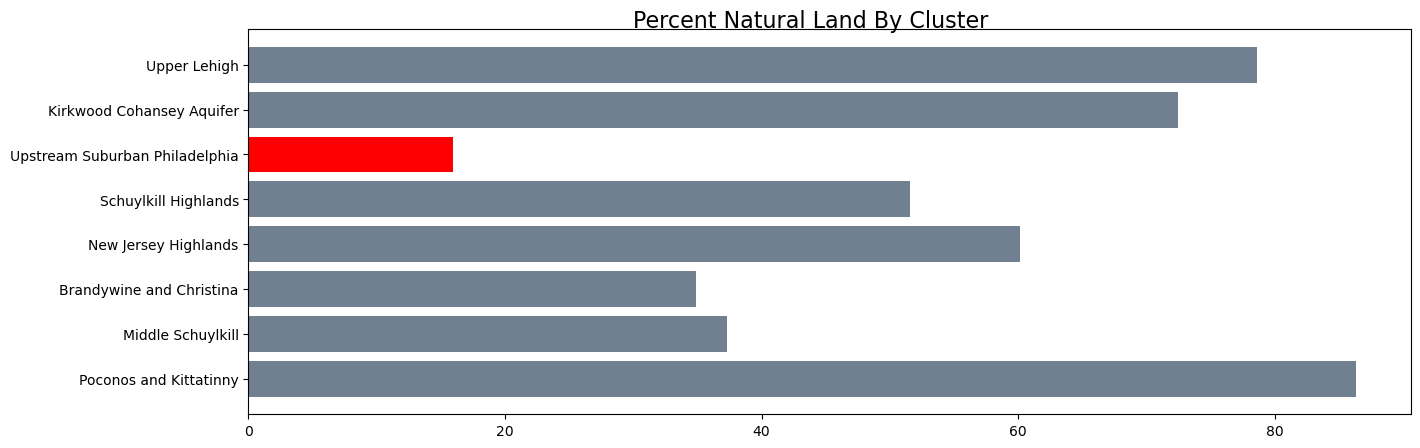

In [60]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
fig.suptitle('Percent Natural Land By Cluster',fontsize=16,y=0.92)

colors = ['red' if i < 30 else 'slategrey' for i in clusterjoin_gdf['perc_natural']]
plt.barh(clusterjoin_gdf['name'], width=clusterjoin_gdf['perc_natural'], color=colors) 
plt.show()

### Focus area by cluster

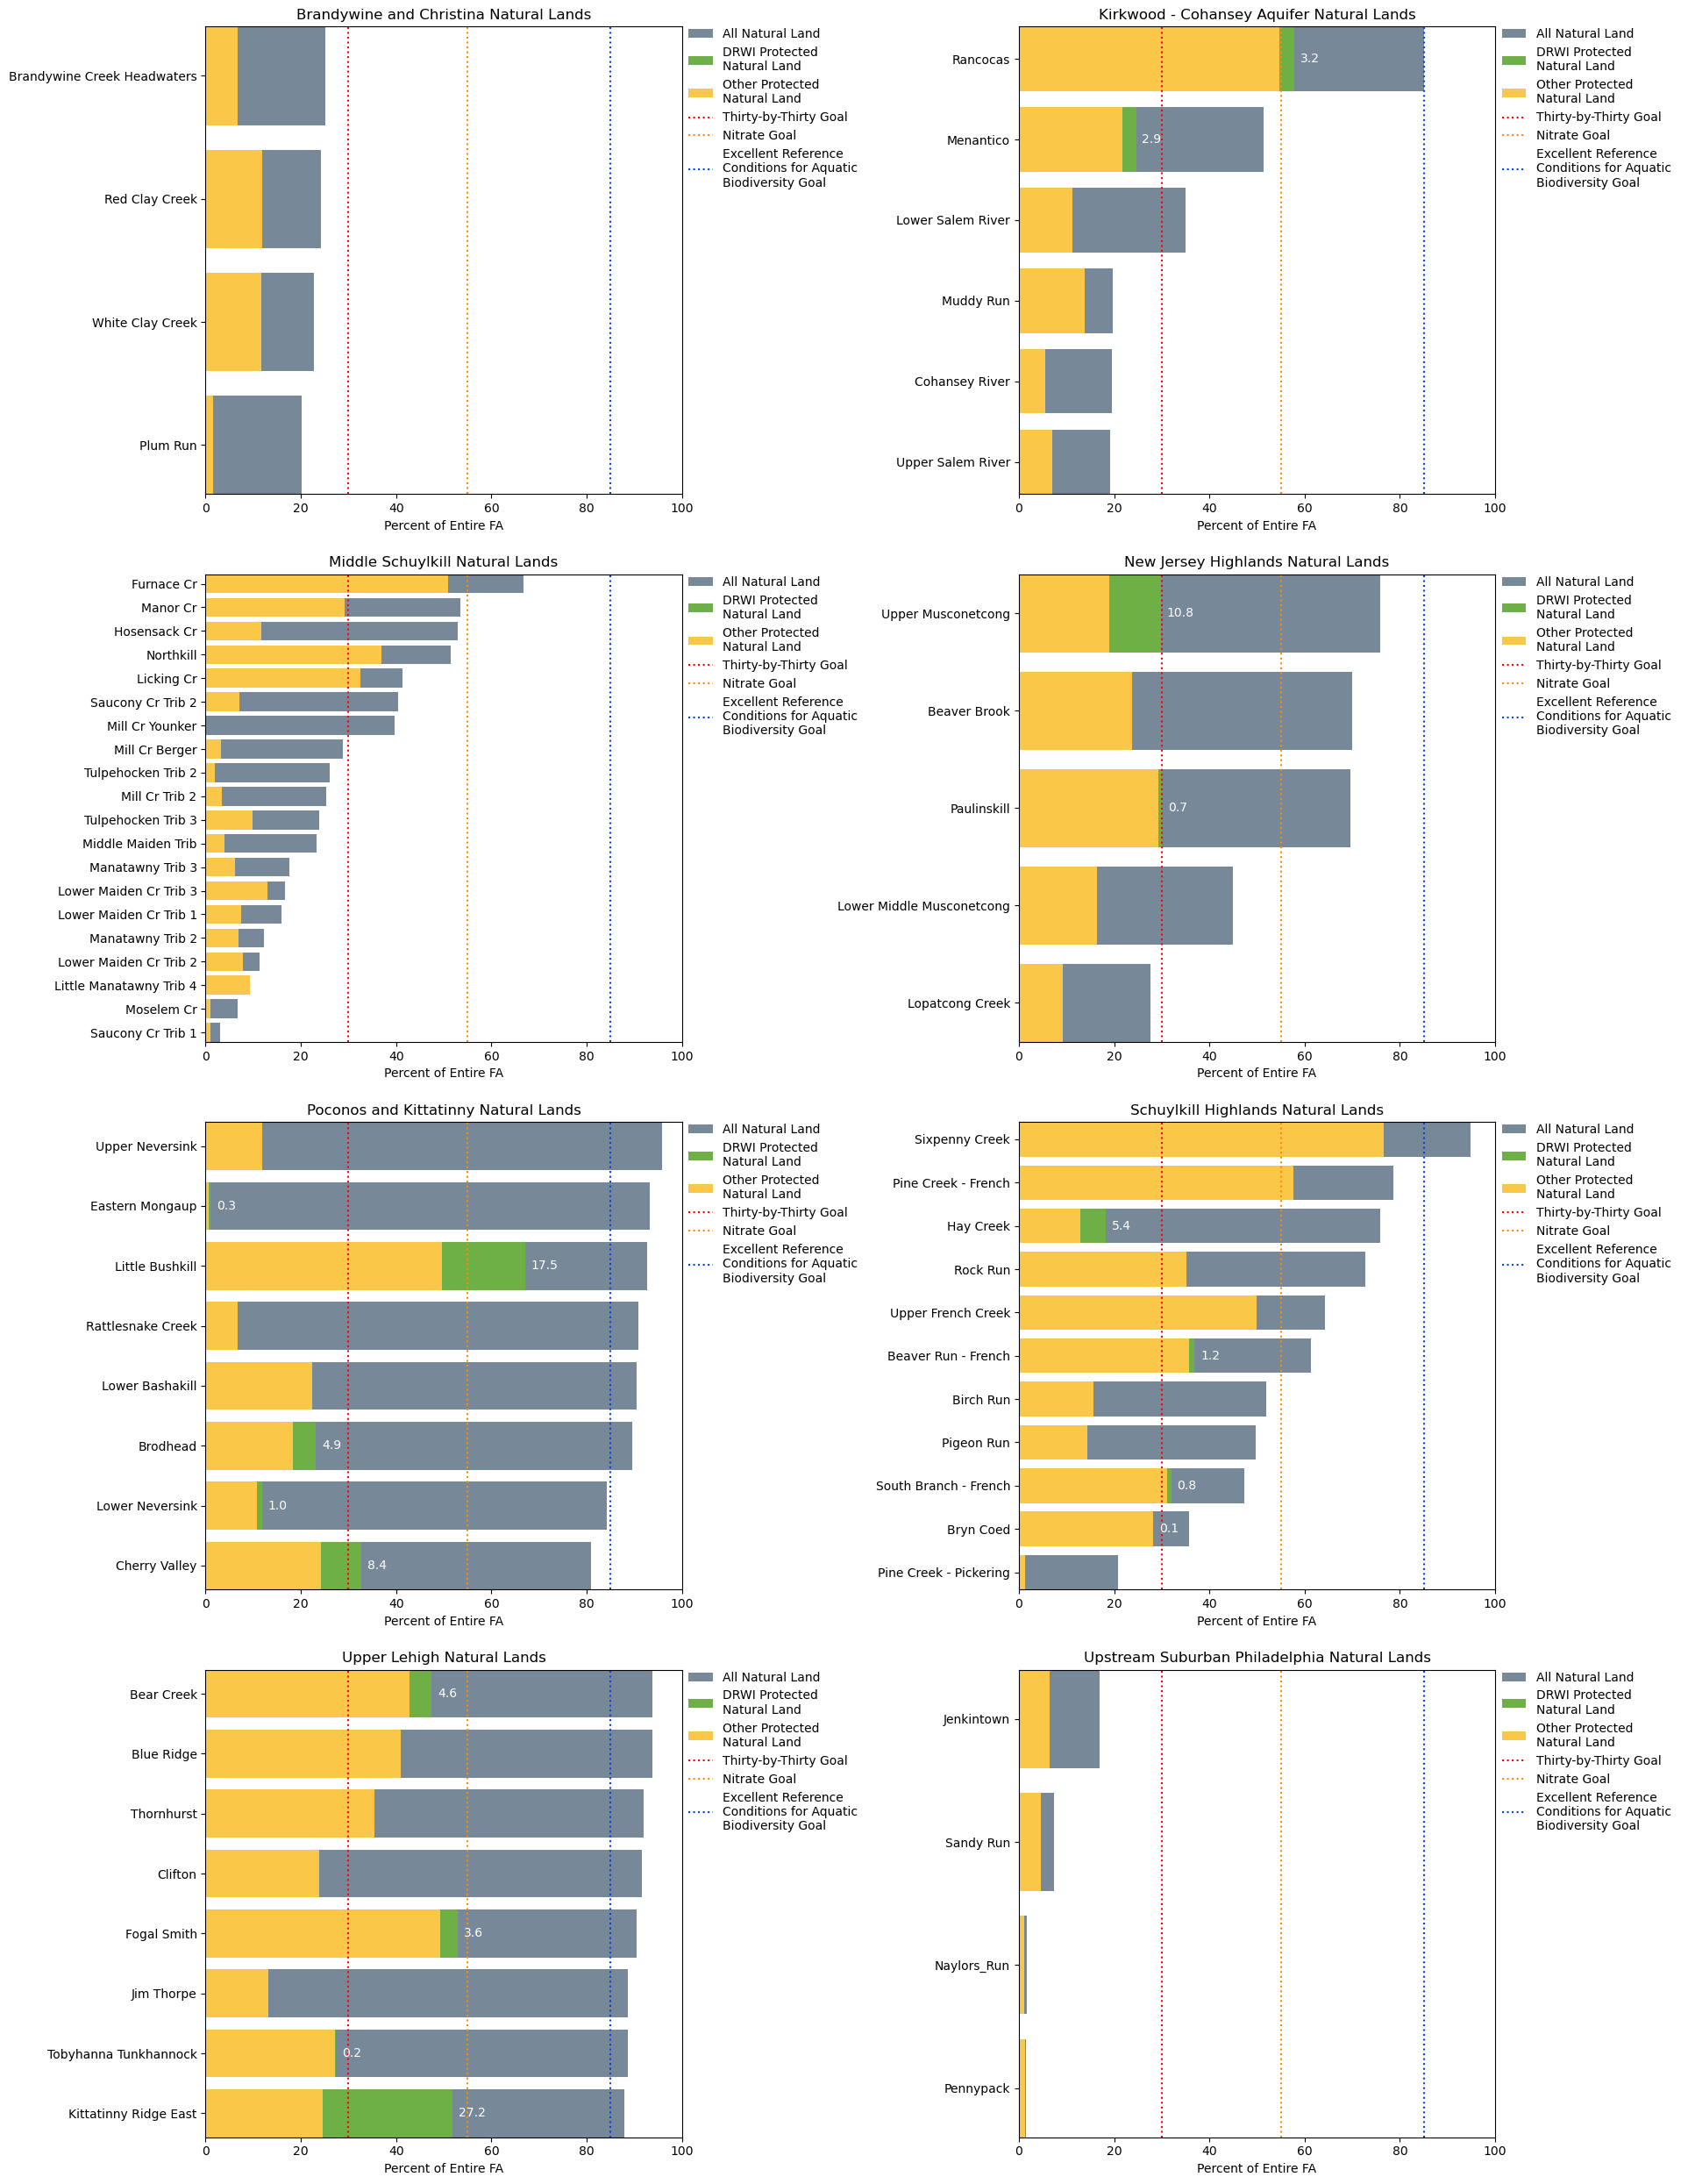

In [61]:
pa.plot_protected_land.plot_natural_cluster(fajoin_gdf,'upper right',(1.4, 1.02))

### Focus area by grouped by natural land %

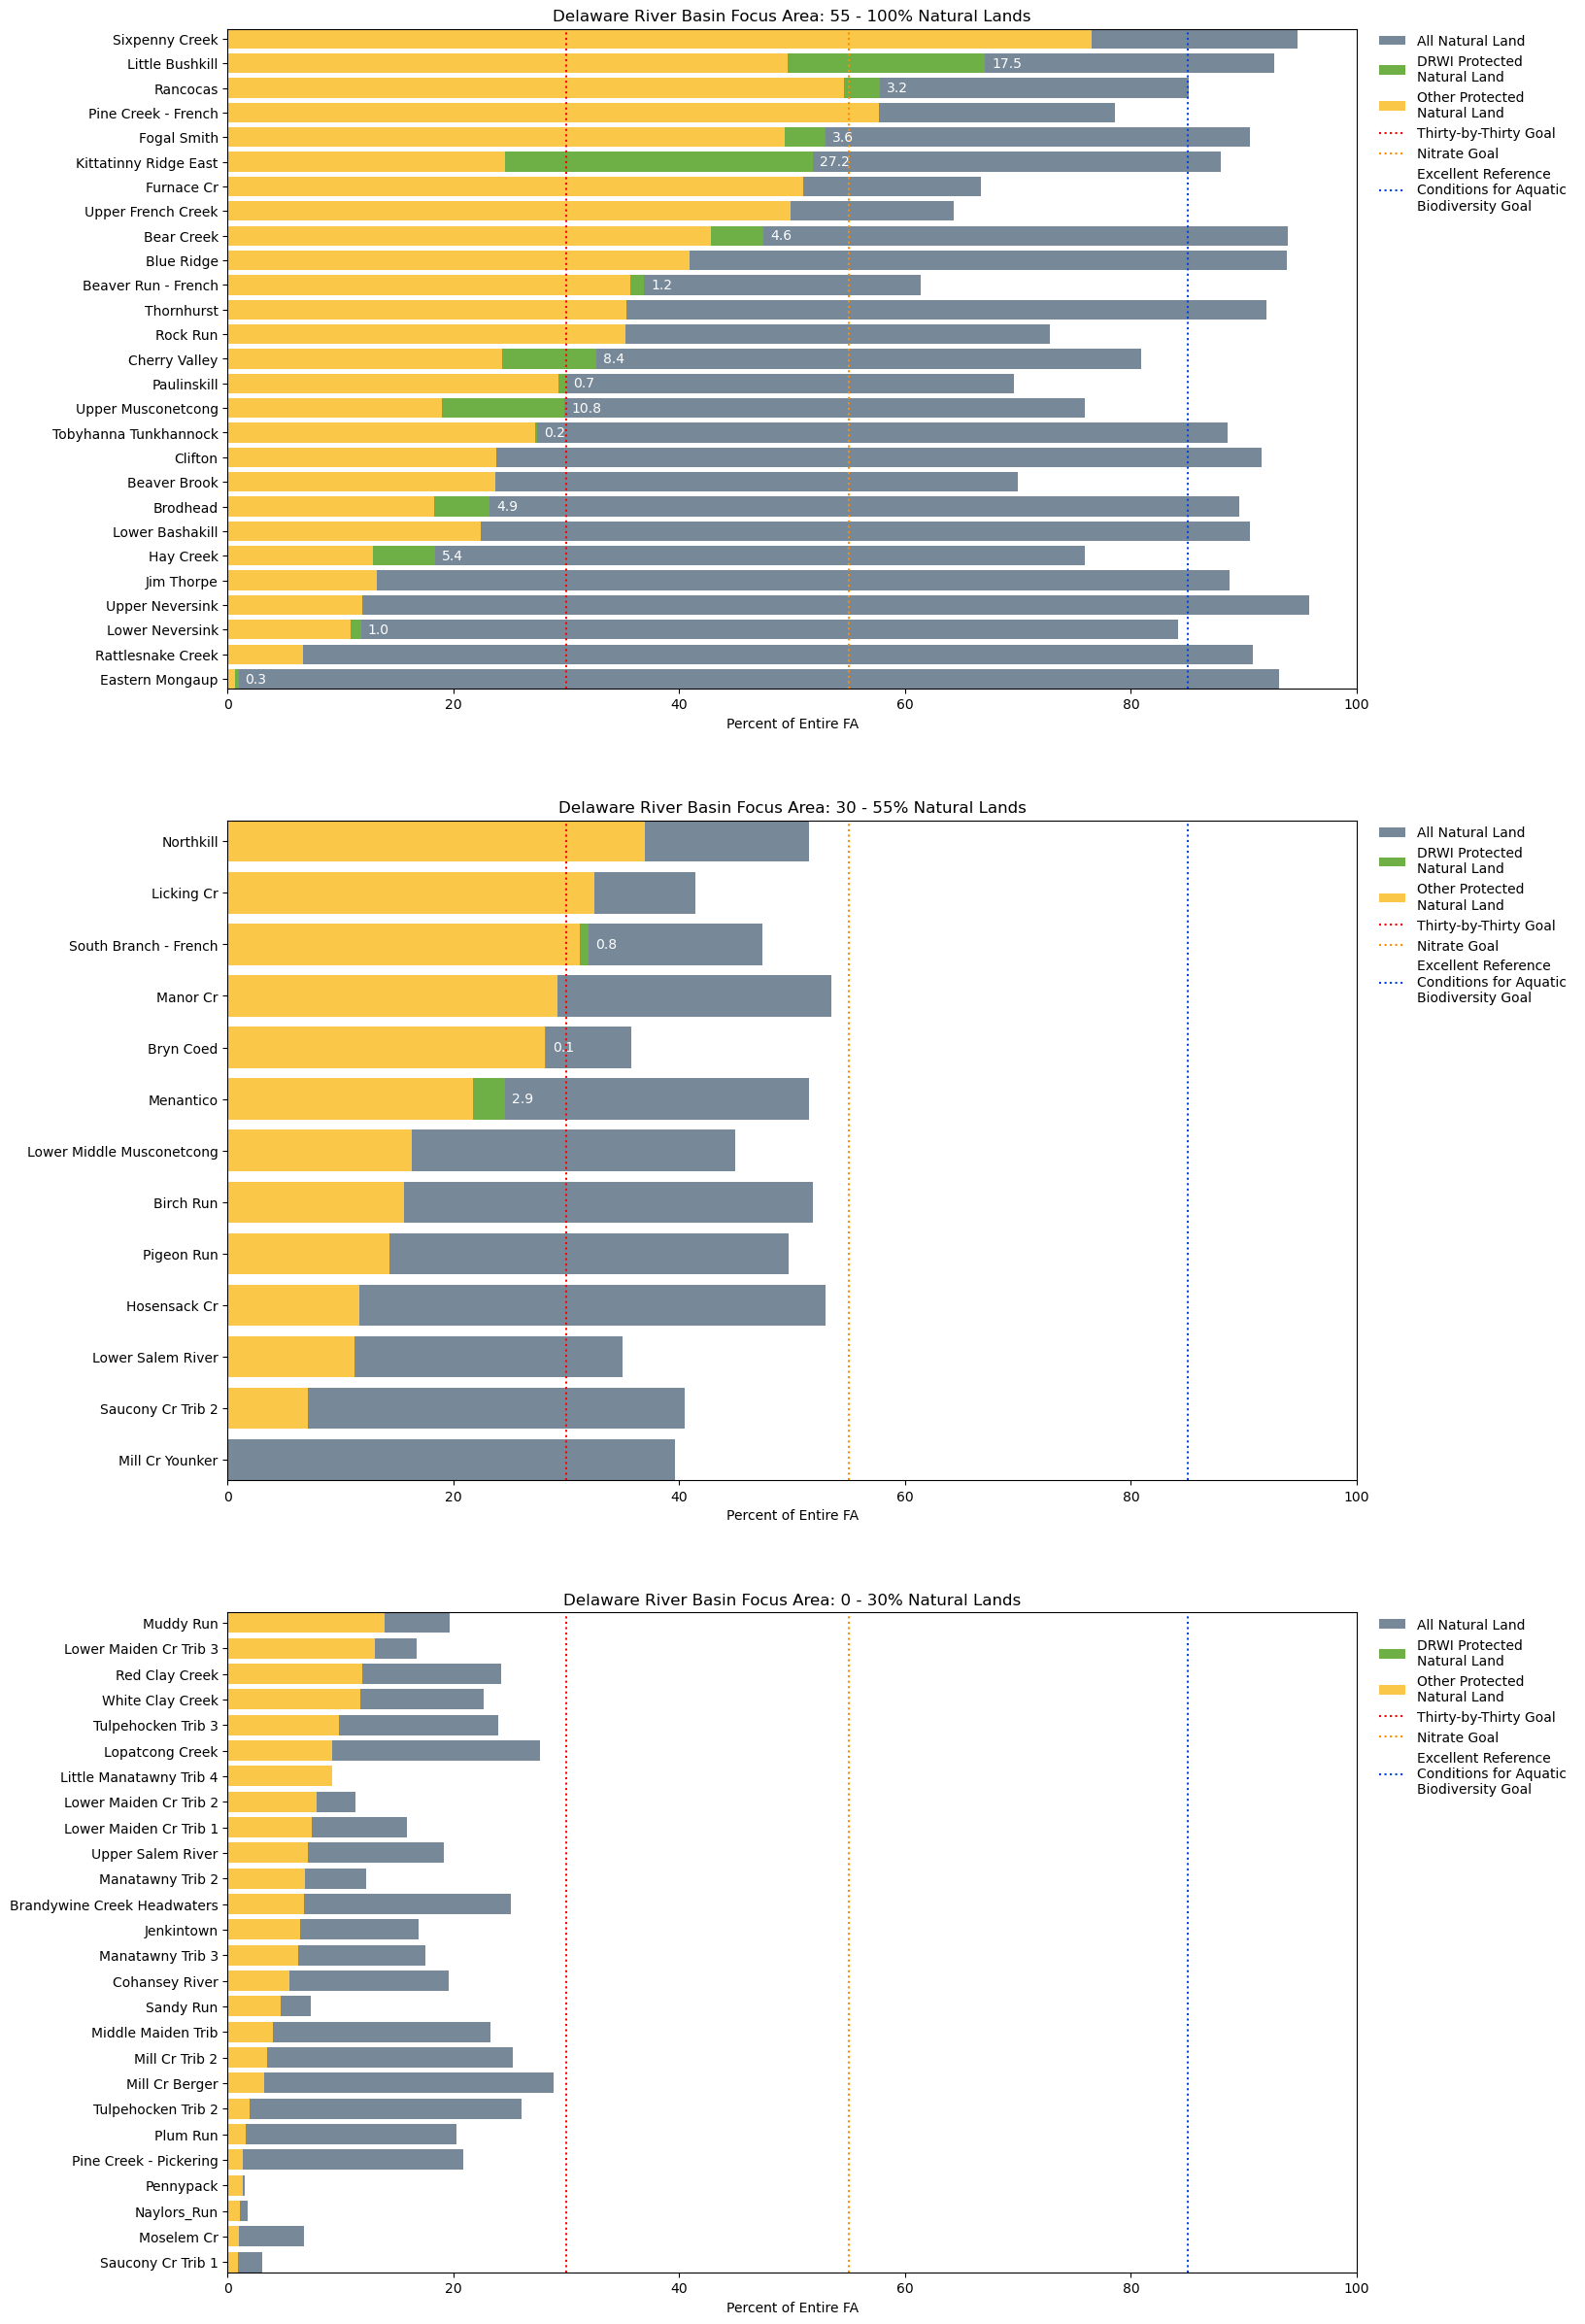

In [62]:
pa.plot_protected_land.plot_natural_level(fajoin_gdf, 'upper right', (1.2, 1.01))

## HUC

### Remove hucs not in the DRWI

In [63]:
huc08_in_drb_gdf = huc08_outlets_drwi_gdf.loc[huc08_outlets_drwi_gdf.in_drb==True]
huc08_in_drb_gdf = huc08_in_drb_gdf.drop(['02040204'], axis=0)
huc08_in_drb_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 12 entries, 02040101 to 02040207
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   huc08_name  12 non-null     category
 1   geometry    12 non-null     geometry
 2   comid       12 non-null     int64   
 3   nord        12 non-null     int64   
 4   in_drb      12 non-null     boolean 
dtypes: boolean(1), category(1), geometry(1), int64(2)
memory usage: 1.7 KB


In [97]:
huc12_outlets_drwi_gdf.huc12_name['020402040000']

'Delaware Bay-Deep'

In [64]:
# For compatiblity with Caitlin's code, 
# we're including all but one of the DRWI HUC12s
huc12_in_drb_gdf = huc12join_gdf
huc12_in_drb_gdf = huc12_in_drb_gdf.drop('020402040000', axis=0)

### Add protected columns

In [65]:
huc12_protec_columns = ['huc_ac', 'wcpa_ac', 'fd_ac', 'total_perc_protected',]
huc12_in_drb_gdf[huc12_protec_columns] = huc12_protec_gdf[huc12_protec_columns]
huc12_in_drb_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 480 entries, 020401010101 to 020403020407
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   huc12_name            480 non-null    category
 1   geometry              480 non-null    geometry
 2   centroid_xy           480 non-null    object  
 3   comid                 480 non-null    Int64   
 4   nord                  480 non-null    Int64   
 5   to_huc12              480 non-null    category
 6   outlet_comid          480 non-null    Int64   
 7   from_huc12s           230 non-null    object  
 8   inlet_comids          230 non-null    object  
 9   outlet_comids         480 non-null    object  
 10  huc10                 480 non-null    category
 11  huc10_name            480 non-null    category
 12  huc08                 480 non-null    category
 13  huc08_name            480 non-null    category
 14  in_drb                48

### Add HUC names for plotting

In [66]:
# Make alias to for backward compatibilty with Caitlin's code
huc12_in_drb_names_gdf = huc12_in_drb_gdf

In [67]:
# ISSUE some HUC 12 names are linked to more than one number
# Bear Breek (020401060203 & 020402030206)
# Beaver Brook (020401040501 & 020401050203)
# Mill Brook (020401020401 & 020401040503)
#pa.plot_protected_land.plot_hucs_natural_level(huc12_in_drb_names_gdf, 'upper right', (1.1, 1.5))

## Maps

In [68]:
# Reproject for plotting
gdf_list = [fielddocjoin_gdf, clusterjoin_gdf, fajoin_gdf,
            wcpajoin_gdf, huc12join_gdf, huc08_gdf, huc08_in_drb_gdf,
            huc12_gdf, fielddoc_gdf, wcpa_gdf, huc12_in_drb_gdf]

for item in gdf_list:
    item.to_crs(crs=3857, inplace=True)

### HUC

In [69]:
cmap = cmr.get_sub_cmap('cet_CET_L18', 0.1, 1)

#### Remaining work difference

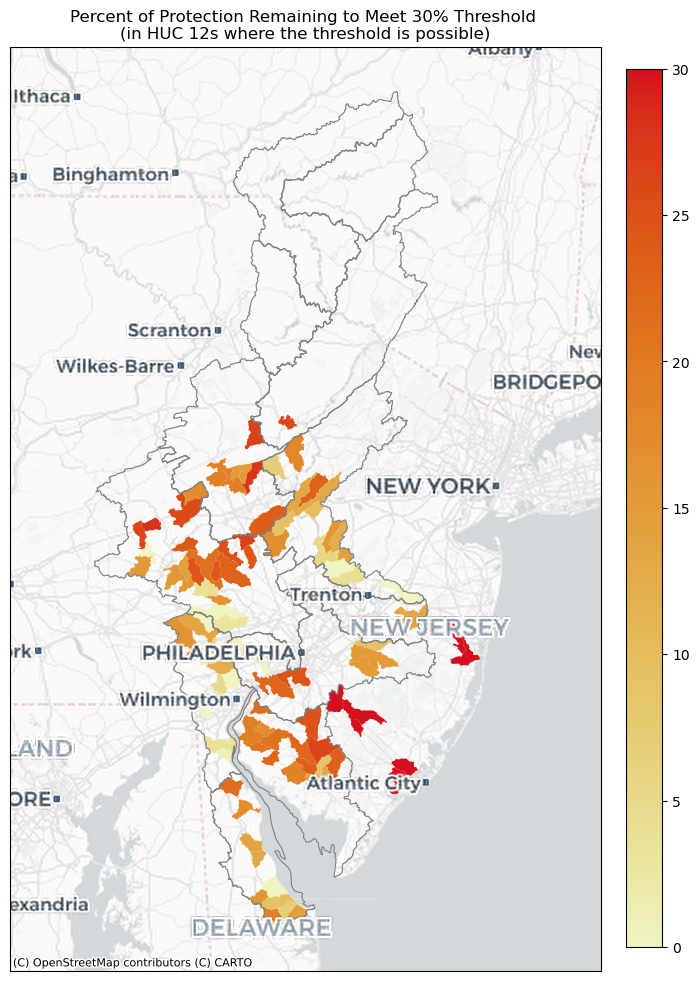

In [70]:
pa.plot.plot_remaining_work_dif(
    huc12_in_drb_gdf, threshold=30, 
    incl_boundary=True, boundarygdf = huc08_in_drb_gdf, 
    cmap=cmap,
)

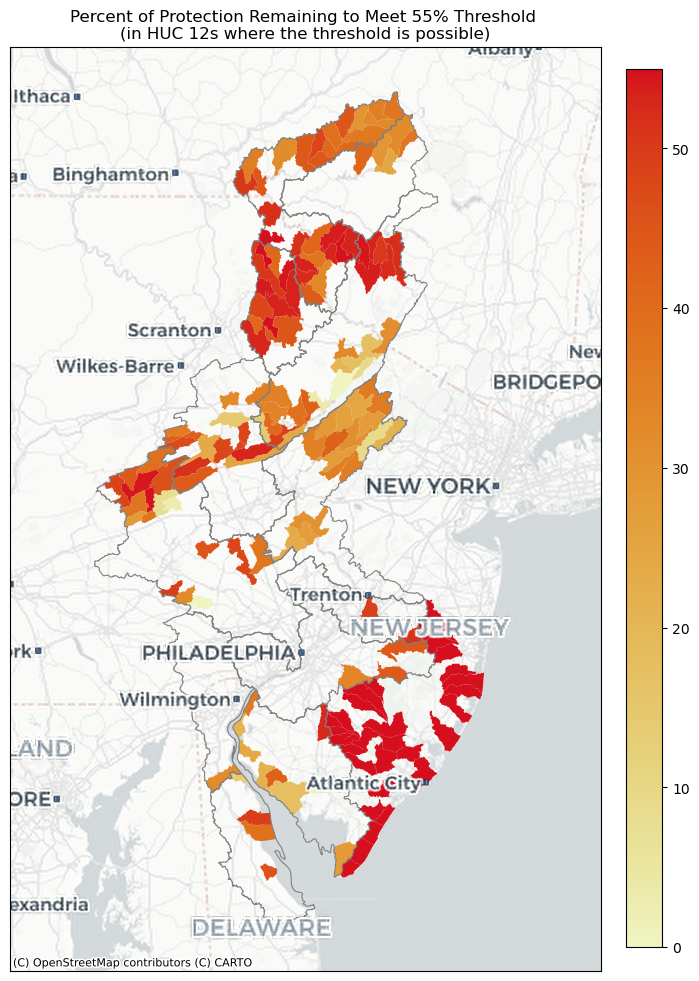

In [71]:
pa.plot.plot_remaining_work_dif(
    huc12_in_drb_gdf, threshold=55, 
    incl_boundary=True, boundarygdf = huc08_in_drb_gdf,
    cmap=cmap,
)

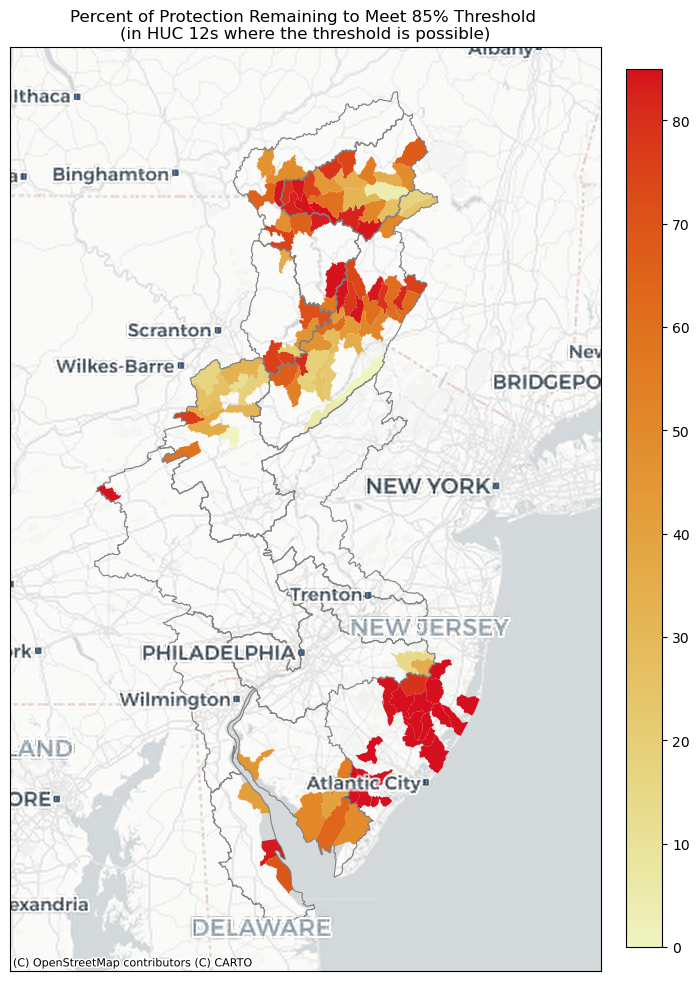

In [72]:
pa.plot.plot_remaining_work_dif(
    huc12_in_drb_gdf, threshold=85, 
    incl_boundary=True, boundarygdf = huc08_in_drb_gdf,
    cmap=cmap,
)

#### Natural Land

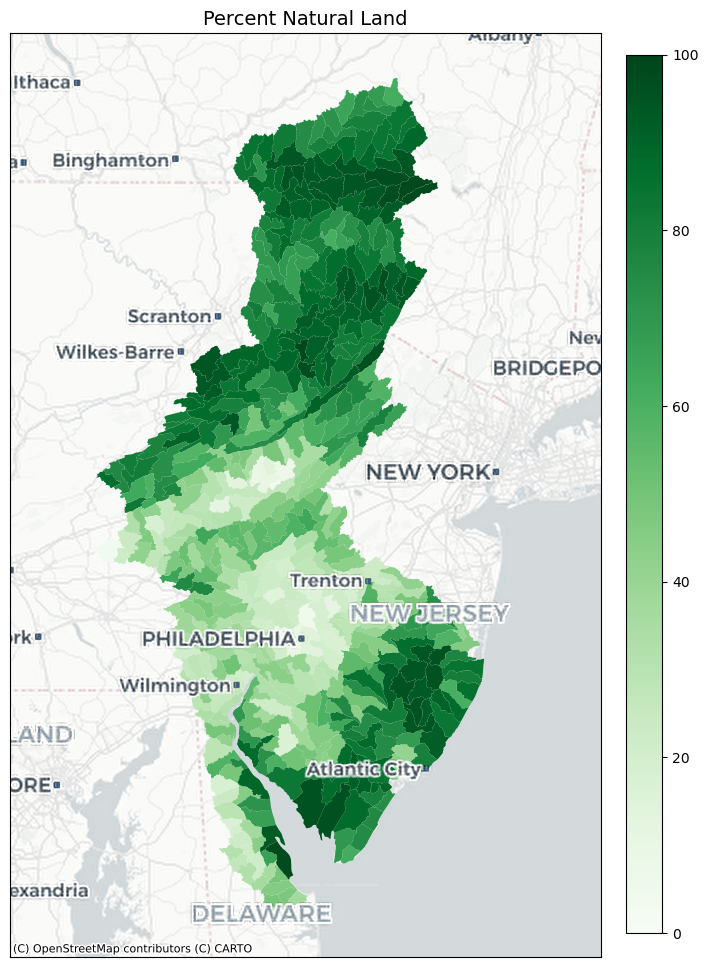

In [73]:
pa.plot.plot_protec_nat(huc12_in_drb_gdf, 'natural')

#### Protected Land

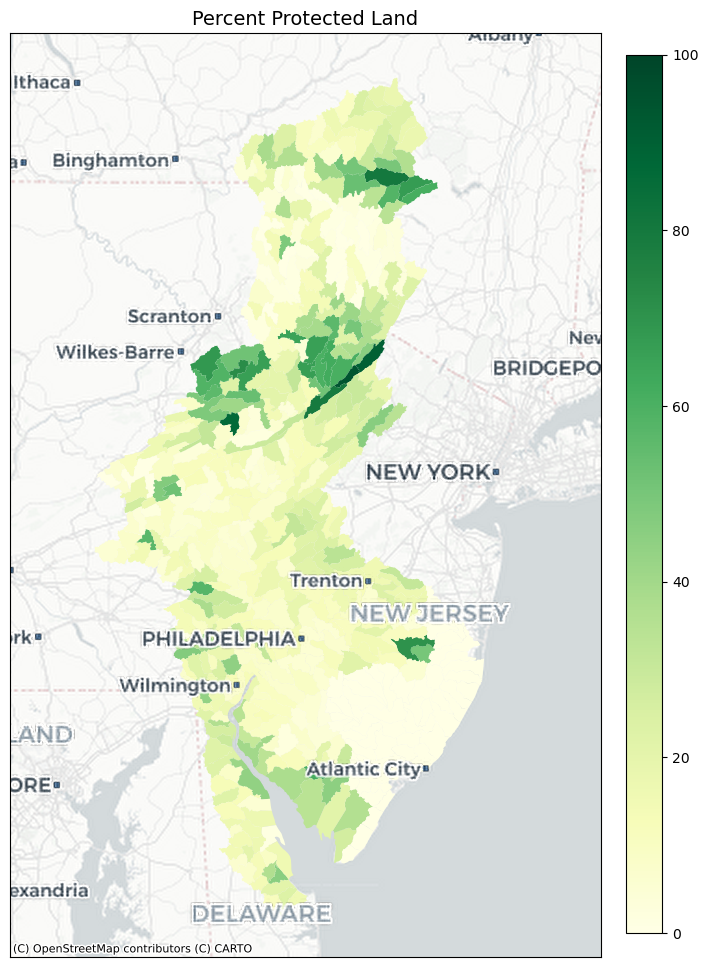

In [74]:
pa.plot.plot_protec_nat(huc12_in_drb_gdf, 'protected')

# Summary of DRWI protection area
- Total FA
- FA protected
- DRWI FA protected
- FA natural
- FA natural protected
- DRWI FA natural protected

In [75]:
# Sq meters to acres conversion factor used in the following calculations
m2_ac_conv = 4046.86

In [76]:
# Reproject to equal area projection for computation
gdf_list = [fajoin_gdf, fielddoc_gdf, wcpa_gdf]

for item in gdf_list:
    item.to_crs(crs='ESRI:102003', inplace=True)

## Total FA
Compute total area within all focus areas

In [77]:
# Total area (ac)
totalFA = fajoin_gdf.geometry.area.sum()/m2_ac_conv

print(f'Areage of all focus areas: {round(totalFA,2)}')

Areage of all focus areas: 682827.96


## FA Protected
Compute total *protected* area within all focus areas as well WCPA protected and DRWI protected

In [78]:
# Clip protected lands to all focus areas
fd_in_fa = fielddoc_gdf.clip(fajoin_gdf)
wcpa_in_fa = wcpa_gdf.clip(fajoin_gdf)

In [79]:
# Protected areas (ac)
fd_protec = fd_in_fa.geometry.area.sum()/m2_ac_conv
wcpa_protec = wcpa_in_fa.geometry.area.sum()/m2_ac_conv
all_protec = fd_protec + wcpa_protec

print(f'Acreage of all protected land within focus areas: {round(all_protec,2)} \nAcreage of all DRWI protected land within focus areas: {round(fd_protec,2)}')

Acreage of all protected land within focus areas: 236809.69 
Acreage of all DRWI protected land within focus areas: 16525.89


In [80]:
# Percent of all focus areas protected by all and DRWI
perc_fd_protec = round(fd_protec/totalFA*100,2)
perc_all_protec = round(all_protec/totalFA*100,2)
perc_fd_of_all = round(fd_protec/all_protec*100,2)

print(f'Percent of all focus area that is protected: {perc_all_protec} \nPercent of all focus area that is DRWI protected: {perc_fd_protec}')
print(f'Percent of *protected area* that is DRWI protected: {perc_fd_of_all}')

Percent of all focus area that is protected: 34.68 
Percent of all focus area that is DRWI protected: 2.42
Percent of *protected area* that is DRWI protected: 6.98


## FA Natural
Compute total *natural* land within all focus areas

In [81]:
# Natural land area (ac)
naturalFA = fajoin_gdf['natural_area_m2'].sum()/m2_ac_conv

print(f'Acreage of all natural land within focus areas: {round(naturalFA,2)}')

Acreage of all natural land within focus areas: 443396.6


In [82]:
# Percent of all focus area that is natural land
perc_nat = round(naturalFA/totalFA*100,2)

print(f'Percent of all focus area that is natural land: {perc_nat}')

Percent of all focus area that is natural land: 64.94


## FA Natural Protected
Compute the area of natural land that is also protected by all and by just DRWI

In [83]:
# ALl protected natural land within all focus areas (ac)
all_nat_protec = sum((fajoin_gdf.geometry.area*fajoin_gdf['all_protected_nat']/100)/m2_ac_conv)

print(f'Acreage of all natural and protected lands within focus areas: {round(all_nat_protec,2)}')

Acreage of all natural and protected lands within focus areas: 171060.63


In [84]:
# DRWI protected natural land within all focus areas (ac)
fd_nat_protec = sum((fajoin_gdf.geometry.area*fajoin_gdf['FieldDoc_PercNat']/100)/m2_ac_conv)

print(f'Acreage of all natural land that is DRWI protected within focus areas: {round(fd_nat_protec,2)}')

Acreage of all natural land that is DRWI protected within focus areas: 15633.4


In [85]:
# Percent of natural land protected
perc_nat_protec = round(all_nat_protec/naturalFA*100,2)
perc_fd_protec = round(fd_nat_protec/naturalFA*100,2)
perc_fd_nat_protec = round(fd_nat_protec/all_nat_protec*100, 2)

print(f'Percent of all natural area that is protected: {perc_nat_protec} \nPercent of all natural area that is DRWI protected: {perc_fd_protec}')
print(f'Percent of *protected natural area* that is DRWI protected: {perc_fd_nat_protec}')

Percent of all natural area that is protected: 38.58 
Percent of all natural area that is DRWI protected: 3.53
Percent of *protected natural area* that is DRWI protected: 9.14


# Save Results

In [86]:
fajoin_gdf.info()
fajoin_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 66 entries, Brandywine Creek Headwaters to Naylors_Run
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   cluster            66 non-null     category
 1   strategy           59 non-null     category
 2   nord               66 non-null     int64   
 3   phase              66 non-null     category
 4   geom               66 non-null     geometry
 5   area_acres         66 non-null     float64 
 6   name_final         59 non-null     category
 7   mmw_area_m2        66 non-null     float64 
 8   forest_area_m2     66 non-null     float64 
 9   natural_area_m2    66 non-null     float64 
 10  perc_forest        66 non-null     float64 
 11  perc_natural       66 non-null     float64 
 12  ans_area_ac        66 non-null     float64 
 13  FieldDoc_PercNat   66 non-null     float64 
 14  WCPA_PercNat       66 non-null     float64 
 15  all_protec

cluster     strategy   nord  \
name                                                                           
Brandywine Creek Headwaters     Brandywine and Christina  restoration   1165   
Plum Run                        Brandywine and Christina  restoration    928   
Red Clay Creek                  Brandywine and Christina  restoration   1469   
White Clay Creek                Brandywine and Christina  restoration   1351   
Cohansey River               Kirkwood - Cohansey Aquifer  restoration  14605   

                               phase  \
name                                   
Brandywine Creek Headwaters  Phase 2   
Plum Run                     Phase 2   
Red Clay Creek               Phase 2   
White Clay Creek             Phase 2   
Cohansey River               Phase 2   

                                                                          geom  \
name                                                                             
Brandywine Creek Headwaters  MULTIPOLYGON (((1686405.286 471511.238, 168640...   
Plum Run                     MULTIPOLYGON (((1712902.753 454768.959, 171289...   
Red Clay Creek               MULTIPOLYGON (((1708818.239 448622.021, 170876...   
White Clay Creek             MULTIPOLYGON (((1697981.063 449274.215, 169799...   
Cohansey River               MULTIPOLYGON (((1754834.843 413848.554, 175480...   

                             area_acres                   name_final  \
name                                                                   
Brandywine Creek Headwaters  11800.8328  Brandywine Creek Headwaters   
Plum Run                      2380.8159                     Plum Run   
Red Clay Creek                6968.2479               Red Clay Creek   
White Clay Creek             10654.6468             White Clay Creek   
Cohansey River               26857.2196               Cohansey River   

                              mmw_area_m2  forest_area_m2  natural_area_m2  \
name                                                                         
Brandywine Creek Headwaters  4.764146e+07    9.132970e+06     1.193953e+07   
Plum Run                     9.616799e+06    1.568405e+06     1.944356e+06   
Red Clay Creek               2.814272e+07    5.735318e+06     6.813830e+06   
White Clay Creek             4.300959e+07    8.251267e+06     9.755086e+06   
Cohansey River               1.084481e+08    1.189575e+07     2.124133e+07   

                             perc_forest  perc_natural  ans_area_ac  \
name                                                                  
Brandywine Creek Headwaters    19.170214     25.061208   11800.8328   
Plum Run                       16.309013     20.218324    2380.8159   
Red Clay Creek                 20.379404     24.211701    6968.2479   
White Clay Creek               19.184712     22.681187   10654.6468   
Cohansey River                 10.969071     19.586622   26857.2196   

                             FieldDoc_PercNat  WCPA_PercNat  all_protected_nat  
name                                                                            
Brandywine Creek Headwaters               0.0      6.743618           6.743618  
Plum Run                                  0.0      1.554436           1.554436  
Red Clay Creek                            0.0     11.892986          11.892986  
White Clay Creek                          0.0     11.707371          11.707371  
Cohansey River                            0.0      5.479458           5.479458

In [87]:
fajoin_gdf.to_parquet(
    data_output_path /'focusarea_natural_protected.parquet',
    engine='pyarrow',
    compression='brotli',
)
fajoin_gdf.to_csv(
    data_output_path /'focusarea_natural_protected.csv',
)

In [88]:
huc12_in_drb_gdf.info()
huc12_in_drb_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
CategoricalIndex: 480 entries, 020401010101 to 020403020407
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   huc12_name            480 non-null    category
 1   geometry              480 non-null    geometry
 2   centroid_xy           480 non-null    object  
 3   comid                 480 non-null    Int64   
 4   nord                  480 non-null    Int64   
 5   to_huc12              480 non-null    category
 6   outlet_comid          480 non-null    Int64   
 7   from_huc12s           230 non-null    object  
 8   inlet_comids          230 non-null    object  
 9   outlet_comids         480 non-null    object  
 10  huc10                 480 non-null    category
 11  huc10_name            480 non-null    category
 12  huc08                 480 non-null    category
 13  huc08_name            480 non-null    category
 14  in_drb                48

huc12_name  \
huc12                                                            
020401010101   Town Brook-Headwaters West Brach Delaware River   
020401010102  Betty Brook-Headwaters West Brach Delaware River   
020401010103   Rose Brook-Headwaters West Brach Delaware River   
020401010104    Elk Creek-Headwaters West Brach Delaware River   
020401010105                       Upper Little Delaware River   

                                                       geometry  \
huc12                                                             
020401010101  POLYGON ((-8303725.462 5224646.990, -8303761.0...   
020401010102  POLYGON ((-8315136.657 5225191.846, -8315097.2...   
020401010103  POLYGON ((-8323990.577 5217953.339, -8323948.6...   
020401010104  POLYGON ((-8326727.279 5222215.417, -8326605.6...   
020401010105  POLYGON ((-8319654.283 5208307.086, -8319607.8...   

                                           centroid_xy    comid   nord  \
huc12                                                                    
020401010101  [-74.62155936289159, 42.387091234041016]  2612792  74293   
020401010102   [-74.71393635968639, 42.38194565669812]  2612800  74290   
020401010103  [-74.71097819143394, 42.330665690562654]  2612808  74288   
020401010104   [-74.82334627464569, 42.34506256688788]  2612820  74282   
020401010105   [-74.78436638151948, 42.27096486797448]  2612842  74311   

                  to_huc12  outlet_comid     from_huc12s inlet_comids  \
huc12                                                                   
020401010101  020401010102       2612792            None         None   
020401010102  020401010103       2612800  [020401010101]    [2612792]   
020401010103  020401010104       2612808  [020401010102]    [2612800]   
020401010104  020401010106       2612820  [020401010103]    [2612808]   
020401010105  020401010106       2612842            None         None   

                   outlet_comids  ... perc_natural FieldDoc_PercNat  \
huc12                             ...                                 
020401010101           [2612792]  ...    61.425377              0.0   
020401010102  [2612800, 2612922]  ...    68.347173              0.0   
020401010103           [2612808]  ...    73.763658              0.0   
020401010104           [2612820]  ...    73.309234              0.0   
020401010105           [2612842]  ...    79.402558              0.0   

             WCPA_PercNat Tot_PercNatProtec  OppParcel_Perc        huc_ac  \
huc12                                                                       
020401010101    11.161103         11.161103       15.255857  20587.095556   
020401010102    12.398970         12.398970       10.299569  16095.446101   
020401010103    18.861160         18.861160       15.208027  16327.166166   
020401010104    18.759219         18.759219        5.196772  17537.187547   
020401010105    16.364108         16.364108       16.212109  33390.287564   

                  wcpa_ac  fd_ac  total_perc_protected  Percent_Remaining  
huc12                                                                      
020401010101  3644.342375    0.0             17.702071          67.297929  
020401010102  3181.490963    0.0             19.766404          65.233596  
020401010103  3628.493584    0.0             22.223658          62.776342  
020401010104  4445.354878    0.0             25.348163          59.651837  
020401010105  6111.516409    0.0             18.303276          66.696724  

[5 rows x 29 columns]

In [89]:
huc12_in_drb_gdf.to_parquet(
    data_output_path /'huc12_natural_protected.parquet',
    engine='pyarrow',
    compression='brotli',
)
huc12_in_drb_gdf.to_csv(
    data_output_path /'huc12_natural_protected.csv',
)